In [83]:
from Bio.PDB import *

# parser = PDBParser()
parser = MMCIFParser()
# structure = parser.get_structure("", "data/2kdk.pdb")
structure = parser.get_structure("", "data/clock_bmal1_modelled.cif")
models = structure.get_models()

# Example usage
cif_file = 'data/clock_bmal1_modelled.cif'  # Replace with your CIF file path

protein = {}
for model in models:
    print("model")
    chains = model.get_chains()
    for chain in chains:
        chain_residues = []
        # print(chain.id)
        atoms = chain.get_atoms()
        # count = 0
        atoms_list = []
        for atom in atoms:
            if atom.name=="CA":
                atoms_list.append(atom)
                # count += 1
                ca_atom = atom
                ca_coord = atom.get_coord()
                # print(ca_atom, ca_coord)
                residue = atom.get_parent()
                # print(residue.get_resname())
                # if count==2:
                    # break
                chain_residues.append(atom)
        protein[chain.id] = chain_residues
        # print(atoms_list)
        # print(atoms_list[0]-atoms_list[1])
        # print(atoms_list[1]-atoms_list[0])

for chain in protein:
    print(len(protein[chain]))
    print(chain)
residueNames = []
x, y , z = [], [], []
for atom in protein["A"]:
    residue = atom.get_parent()
    residueNames.append(residue.get_resname())
    x.append(atom.get_coord()[0])
    y.append(atom.get_coord()[1])
    z.append(atom.get_coord()[2])
for atom in protein["B"]:
    residue = atom.get_parent()
    residueNames.append(residue.get_resname())
    x.append(atom.get_coord()[0])
    y.append(atom.get_coord()[1])
    z.append(atom.get_coord()[2])
print(len(residueNames))
print(len(x), len(y), len(z))
print(x)
print(y)
print(z)
domain = ["" for _ in range(728)]
for i in range(728):
    if i>=0 and i<=50:
        domain[i] = "bHLH"
    elif i>=76 and i<=230:
        domain[i] = "PAS_A"
    elif i>=231 and i<=353:
        domain[i] = "PAS_B"
    elif i>=354 and i<=409:
        domain[i] = "bHLH"
    elif i>=426 and i<=606:
        domain[i] = "PAS_A"
    elif i>=609 and i<=727:
        domain[i] = "PAS_B"
    else:
        domain[i] = "None"
print(domain)
chain = ["" for _ in range(728)]
for i in range(728):
    if i<354:
        chain[i] = "CLOCK"
    else:
        chain[i] = "BMAL1"
print(len(chain))
print(chain)
res = [x for x in range(728)]
print(len(res))
print(res)

distanceThreshold = 7.0
chainAEdges = []
chainA = protein['A']
for i in range(len(chainA)-1):
    for j in range(i+1, len(chainA)):
        distance = chainA[i]-chainA[j]
        if distance>0.0 and distance<=distanceThreshold:
            # print(i, j, distance)
            chainAEdges.append((i,j))
print("No. of edges in chain A graph:",len(chainAEdges))

nodeIdGap = len(protein['A'])
chainBEdges = []
chainB = protein['B']
for i in range(len(chainB)-1):
    for j in range(i+1, len(chainB)):
        distance = chainB[i]-chainB[j]
        if distance>0.0 and distance<=distanceThreshold:
            # print(i+nodeIdGap, j+nodeIdGap, distance)
            chainBEdges.append((i+nodeIdGap, j+nodeIdGap))
print("No. of edges in chain B graph:",len(chainBEdges))

chainAB = []
chainAB.extend(protein['A'])
chainAB.extend(protein['B'])
chainABEdges = []
for i in range(len(chainAB)-1):
    for j in range(i+1, len(chainAB)):
        distance = chainAB[i]-chainAB[j]
        if distance>0.0 and distance<=distanceThreshold:
            # print(i, j, distance)
            chainABEdges.append((i,j))
print("No. of edges in chain AB graph:",len(chainABEdges))
print(len(chainABEdges)-len(chainBEdges)-len(chainAEdges))

model
354
A
374
B
728
728 728 728
[158.63, 157.98, 158.36, 154.56, 154.11, 156.39, 154.48, 151.27, 152.81, 154.64, 151.32, 149.71, 152.54, 152.17, 148.39, 149.44, 151.81, 149.2, 146.44, 148.73, 149.32, 145.48, 144.83, 147.8, 146.2, 142.75, 144.27, 146.5, 143.47, 141.36, 144.48, 143.97, 146.32, 147.37, 146.81, 150.67, 151.99, 153.34, 155.46, 153.91, 155.58, 154.49, 150.93, 150.89, 152.63, 150.01, 147.4, 148.58, 149.21, 145.55, 143.88, 145.82, 144.41, 140.78, 141.45, 142.6, 139.79, 137.2, 138.8, 139.0, 135.8, 133.59, 130.2, 131.01, 127.63, 129.71, 132.25, 129.6, 128.54, 125.12, 125.03, 125.77, 127.24, 124.07, 122.2, 122.75, 123.16, 119.71, 117.95, 119.87, 118.88, 115.12, 114.81, 116.92, 115.04, 111.47, 112.27, 114.02, 111.14, 113.59, 114.73, 117.81, 118.14, 120.95, 121.2, 123.83, 124.96, 122.62, 119.59, 119.0, 117.96, 120.02, 118.53, 115.8, 114.85, 111.41, 111.02, 110.13, 106.64, 105.72, 106.93, 105.63, 103.32, 105.65, 106.93, 110.59, 109.14, 107.78, 111.22, 114.29, 115.67, 113.6, 114.82

In [4]:
def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

def localCentrality(A, p, maxIterations=1000):
    n = A.shape[0]
    l = np.ones(n) / n
    unitNormal = np.copy(l)
    angle = float(0)
    lHistory = [l.copy()]
    for _ in range(maxIterations):
        lNew = (p*(A.dot(l))) + ((1-p)*unitNormal)
        lHistory.append(lNew.copy())
        angleNew = angle_between(l, lNew)
        if (angleNew==angle) or (angleNew==0):
            break
        l, angle = lNew, angleNew
    return(l)

def globalCentrality(A, C, l, p, maxIterations=1000):
    n = A.shape[0]
    g = np.ones(n) / n
    unitNormal = np.copy(g)
    angle = float(0)
    gHistory = [g.copy()]
    for _ in range(maxIterations):
        gNew = (p*((A+C).dot(g) + C.dot(l))) + ((1-p)*unitNormal)
        gHistory.append(gNew.copy())
        angleNew = angle_between(g, gNew)
        if (angleNew==angle) or (angleNew==0):
            break
        g, angle = gNew, angleNew
    return(g)

def getAC(edges):
    adj = np.zeros(shape=(728, 728))
    for (u, v) in edges:
        adj[u, v] = 1.
        adj[v, u] = 1.
    adj = adj / np.sum(adj, axis=0)
    A, C = np.zeros(shape=(728, 728)), np.zeros(shape=(728, 728))
    for (u, v) in edges:
        if (u<354 and v<354) or (u>=354 and v>=354):
            A[u, v] = adj[u, v]
            A[v, u] = adj[v, u]
        elif (u<354 and v>=354) or (v<354 and u>=354):
            C[u, v] = adj[u, v]
            C[v, u] = adj[v, u]
    return(A, C)

Processing  0  of 727
Processing  50  of 727
Processing  100  of 727
Processing  150  of 727
Processing  200  of 727
Processing  250  of 727
Processing  300  of 727
Processing  350  of 727
Processing  400  of 727
Processing  450  of 727
Processing  500  of 727
Processing  550  of 727
Processing  600  of 727
Processing  650  of 727
Processing  700  of 727


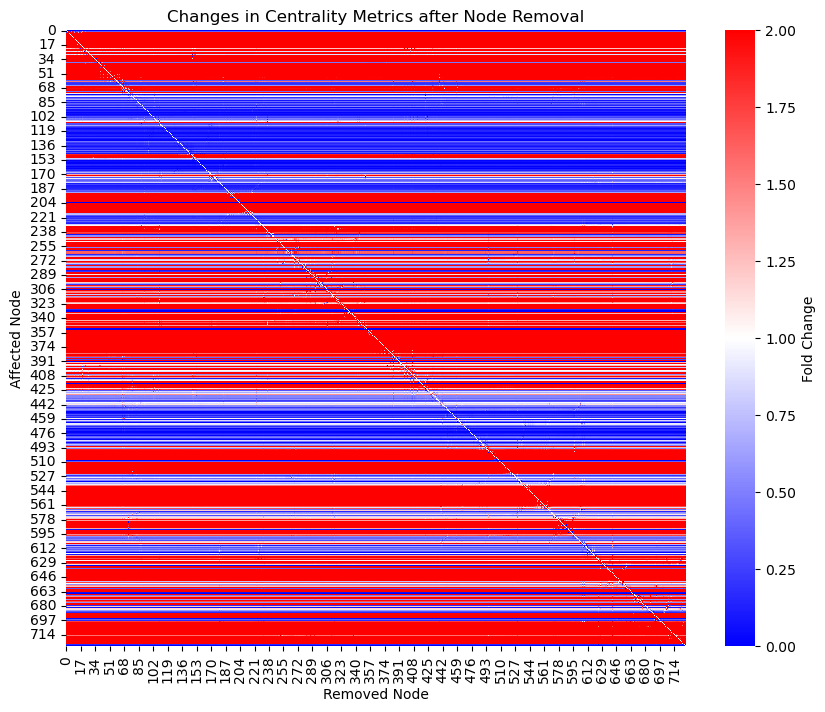

In [27]:
epsilon = 1e-5

def getCentrality(graph, flag):
    node_list = [x for x in range(728)]    
    # Initialize an array to store the normalized centrality changes for each node
    centrality_changes = np.zeros((len(node_list), len(node_list)))
    original_centrality = []
    if flag:
        edges = list(graph.edges())
        A, C = getAC(edges)
        l = localCentrality(A, .9)
        g = globalCentrality(A, C, l, .9)
        original_centrality = g
    else:
        ec = nx.eigenvector_centrality(graph, max_iter=1000, tol=1e-6)
        original_centrality = [ec[x] for x in node_list]

    for node in node_list:
        if node%50==0:
            print("Processing ",node," of",727)
        # Create a copy of the graph and remove the node
        temp_graph = graph.copy()
        temp_graph.remove_node(node)

        new_centralities = []
        # Recompute centralities
        if flag:
            edges = list(temp_graph.edges())
            A, C = getAC(edges)
            l = localCentrality(A, .9)
            g = globalCentrality(A, C, l, .9)
            new_centralities = g
        else:
            new_centralities = nx.betweenness_centrality(temp_graph)
            # new_centralities = nx.eigenvector_centrality(temp_graph, max_iter=1000, tol=1e-6)
            # new_centralities = nx.degree(temp_graph, max_iter=1000, tol=1e-6)
        
        for v in node_list:
            original_c = original_centrality[v]
            if v==node:
                # centrality_changes[node, v] = 1. if original_c != 0 else 0
                centrality_changes[v, node] = np.nan
                continue
            new_c = new_centralities[v]
            # change = (original_c - new_c) / original_c if original_c != 0 else 0
            # change = new_c / original_c if original_c else 0
            # centrality_changes[v, node] = change
            fold_change = new_c / original_c if original_c else 0
            centrality_changes[v, node] = fold_change if fold_change else epsilon 
    
    return centrality_changes

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

G = nx.Graph(chainABEdges)
changes = getCentrality(G, 0)
# Create a heatmap
plt.figure(figsize=(10, 8))
labels = [x for x in range(728)]
vmin, vmax = 0, 2
colors = ['blue', 'white', 'red'] 
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)
sns.heatmap(changes, cmap=cmap, vmin=vmin, vmax=vmax, cbar_kws={'label': 'Fold Change'}, mask=np.isnan(changes)) 
            # xticklabels=labels, yticklabels=labels[::-1])
plt.title("Changes in Centrality Metrics after Node Removal")
plt.xlabel("Removed Node")
plt.ylabel("Affected Node")
plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

/tmp/ipykernel_1952916/3904231512.py:44: RuntimeWarning: invalid value encountered in divide
  adj = adj / np.sum(adj, axis=0)


Processing: 50
Processing: 100
Processing: 150
Processing: 200
Processing: 250
Processing: 300
Processing: 350
Processing: 400
Processing: 450
Processing: 500
Processing: 550
Processing: 600
Processing: 650
Processing: 700


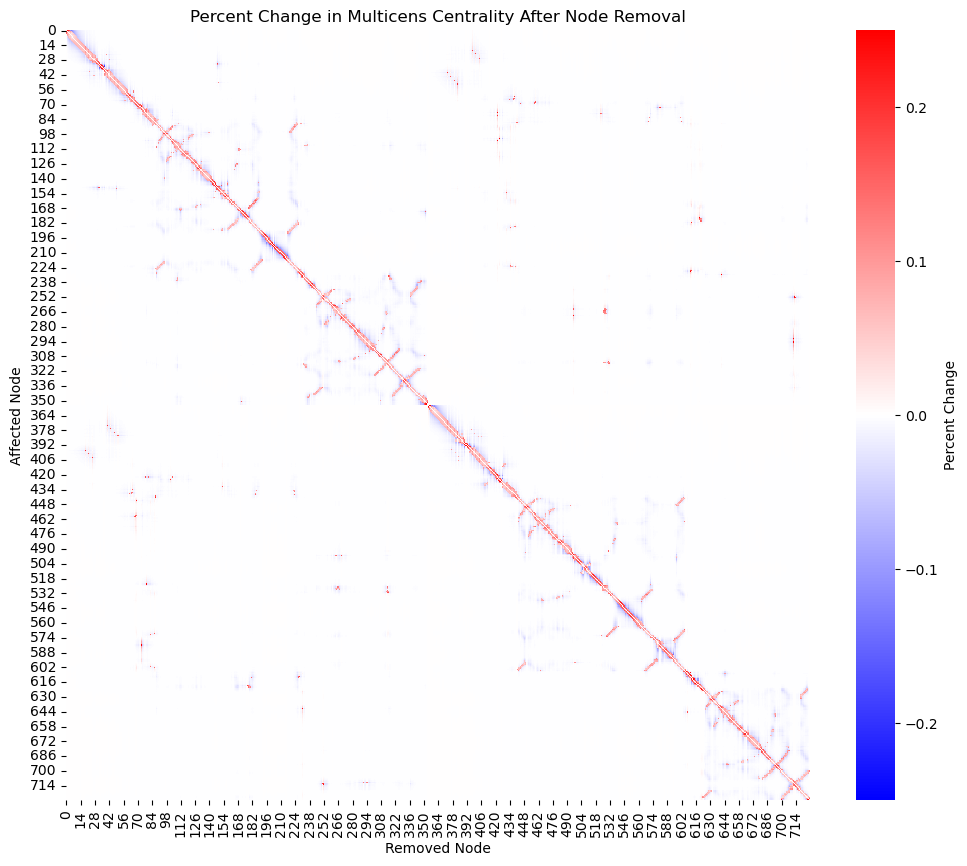

In [96]:
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a sample graph
G = nx.Graph()
edges = [(0, 1), (0, 2), (0, 3), (1, 2), (2, 3), (3, 4)]
# G.add_edges_from(edges)
G.add_edges_from(chainABEdges)

# Step 2: Compute initial degree centrality
# initial_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-6)
# initial_centrality = nx.betweenness_centrality(G)
# initial_centrality = nx.pagerank(G)
edges = list(G.edges())
A, C = getAC(edges)
l = localCentrality(A, .9)
g = globalCentrality(A, C, l, .9)
initial_centrality = g

# Step 3: Calculate fold change centrality values after removing each node
nodes = list(G.nodes())
nodes.sort()
print(nodes)
fold_change_matrix = np.zeros((len(nodes), len(nodes)))  # Initialize matrix for fold change values

for i, removed_node in enumerate(nodes):
    if i%50==0:
        print("Processing:",i)
    # Remove node and calculate centrality for the modified graph
    G_removed = G.copy()
    G_removed.remove_node(removed_node)
    # modified_centrality = nx.eigenvector_centrality(G_removed, max_iter=1000, tol=1e-6)
    # modified_centrality = nx.betweenness_centrality(G_removed)
    # modified_centrality = nx.pagerank(G_removed)
    edges = list(G_removed.edges())
    A, C = getAC(edges)
    l = localCentrality(A, .9)
    g = globalCentrality(A, C, l, .9)
    modified_centrality = g
    
    # Step 4: Calculate fold change for each remaining node
    for j, affected_node in enumerate(nodes):
        if affected_node != removed_node:
            original = initial_centrality[affected_node]
            # new = modified_centrality.get(affected_node, 0)  # If node is missing, set centrality to 0
            new = modified_centrality[affected_node]
            change = (original - new) / original if original != 0 else 0
            # change = new / original if original != 0 else 0  # Avoid division by zero
            fold_change_matrix[j, i] = change 

# Step 5: Visualize the fold change matrix as a heatmap
plt.figure(figsize=(12, 10))
vmin, vmax = -.25, .25
colors = ['blue', 'white', 'red']
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)
sns.heatmap(fold_change_matrix, cmap=cmap, cbar_kws={'label': 'Percent Change'},
            mask=np.isnan(fold_change_matrix), vmin=vmin, vmax=vmax)
plt.xlabel('Removed Node')
plt.ylabel('Affected Node')
plt.title('Percent Change in Multicens Centrality After Node Removal')
plt.show()

In [63]:
import networkx as nx

# Create a graph from the provided edges
edges = [(0, 1), (0, 2), (0, 3), (1, 2), (2, 3), (3, 4)]
G = nx.Graph(edges)

# Calculate betweenness centrality
G_removed = G.copy()
G_removed.remove_node(
betweenness_centrality = nx.betweenness_centrality(G)

# Print the betweenness centrality for each node
for node, centrality in betweenness_centrality.items():
    print(f'Node {node}: Betweenness Centrality = {centrality}')

Node 0: Betweenness Centrality = 0.16666666666666666
Node 1: Betweenness Centrality = 0.0
Node 2: Betweenness Centrality = 0.16666666666666666
Node 3: Betweenness Centrality = 0.5
Node 4: Betweenness Centrality = 0.0
